<a href="https://colab.research.google.com/github/IreneLedyaeva/CAP-5610/blob/master/HW1/problem_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load the training and test data using Keras

In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

### Preparing the training and test images

In [0]:
train_images = train_images_original.reshape(train_images_original.shape[0], 28 * 28)
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape(test_images_original.shape[0], 28 * 28)
test_images = test_images.astype('float32') / 255

### Encoding the training and test labels [0, 1]

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

### Counting a number of connected components in train_images_bw [1, 2 or 3]

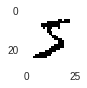

0 1


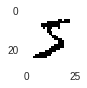

1 1


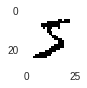

2 1


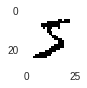

3 1


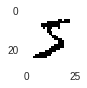

4 1


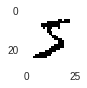

5 1


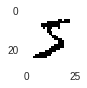

6 1


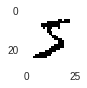

7 1


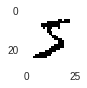

8 1


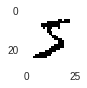

9 1


In [163]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def countComponents(image):
  
  G = nx.Graph()
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if(image[i][j] == 0):
        node = str(i) + str(j)
        G.add_node(node)

  for i in range(image.shape[0]):
    for j in range(image.shape[1] - 1):
      if(image[i][j] == 0 and image[i][j+1] == 0):
        node1 = str(i) + str(j) 
        node2 = str(i) + str(j+1)
        G.add_edge(node1, node2)

  for i in range(image.T.shape[0]):
    for j in range(image.T.shape[1] - 1):
      if(image.T[i][j] == 0 and image.T[i][j+1] == 0):
        node1 = str(j) + str(i) 
        node2 = str(j+1) + str(i)
        G.add_edge(node1, node2)
        
  return len(list(nx.connected_components(G)))
      
train_regions = np.zeros(shape=(train_images.shape[0], 1), dtype=np.int)

for i in range(10):
  train_filter = np.where((train_labels_original == i))
  train_images_bw, train_labels_bw = train_images_original[train_filter], train_labels_original[train_filter]
  train_images_bw = train_images_original.astype('float32') / 255
  train_images_bw = np.around(train_images_bw)
  digit_0 = train_images_bw[0]
  plt.figure(figsize=(1,1))
  plt.imshow(digit_0)
  plt.grid(None)
  plt.show()
  print(train_labels_bw[0], countComponents(train_images_bw[0]))

### The network architecture

In [32]:
from keras import models
from keras import layers

input1 = layers.Input(shape=(28 * 28,))
x1 = layers.Dense(10, activation='softmax')(input1)
input2 = layers.Input(shape=(28 * 28,))
x2 = layers.Dense(10, activation='softmax')(input2)
added = layers.Add()([x1, x2])

out = layers.Dense(10)(added)
model = models.Model(inputs=[input1, input2], outputs=out)

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
epochs = 10
history = model.fit([train_images, train_images], 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=20, 
                      validation_data=([test_images, test_images], test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 104us/step - loss: 8.2648 - acc: 0.1349 - val_loss: 7.0232 - val_acc: 0.1722
Epoch 2/10
60000/60000 [==============================] - 5s 88us/step - loss: 7.2428 - acc: 0.1536 - val_loss: 8.1932 - val_acc: 0.1068
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 7.9275 - acc: 0.1107 - val_loss: 8.1865 - val_acc: 0.1056
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 8.0696 - acc: 0.1100 - val_loss: 8.1961 - val_acc: 0.1061
Epoch 5/10
60000/60000 [==============================] - 5s 87us/step - loss: 8.0165 - acc: 0.1105 - val_loss: 8.1898 - val_acc: 0.1063
Epoch 6/10
60000/60000 [==============================] - 5s 86us/step - loss: 7.9890 - acc: 0.1103 - val_loss: 7.5610 - val_acc: 0.1073
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 7.7697 - acc: 0.1105 - val_loss: 6.6326 - val_ac